Optimal Phase Identification of Single-Phase Customers and PV Panels through Smart Meter Data Using an Optimization Strategy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-xs7535md
  Running command git clone -q https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-xs7535md
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
data_location = 'https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/'

sf_pv_df = pd.read_csv(data_location +  'energy/SF_PV.csv')

In [ ]:
m = NeuralProphet(
    yearly_seasonality=3,
    weekly_seasonality=False,
    daily_seasonality=8,
    growth="off",
    learning_rate=0.1,
)
df_train, df_test = m.split_df(sf_pv_df, freq='H', valid_p = 0.10)

metrics = m.fit(df_train, freq='H', validation_df=df_test, progress='plot')

  0%|          | 0/109 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:922: UserWarning: Using a target size (torch.Size([876])) that is different to the input size (torch.Size([876, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)

  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



In [ ]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,Loss,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
108,0.009209,91.968948,118.041569,0.006695,0.0,0.06328,259.264435,313.77417


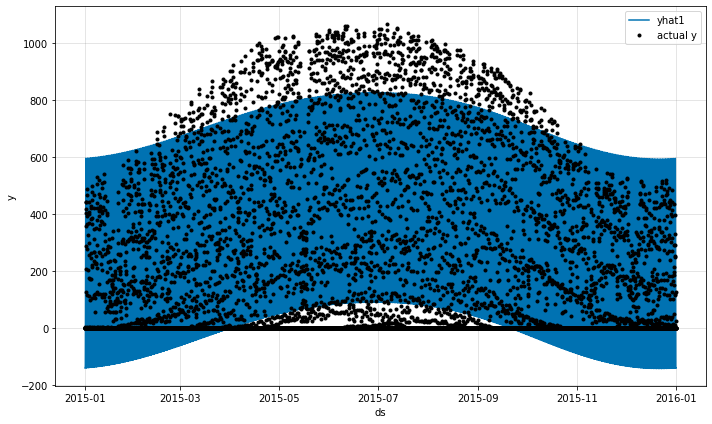

In [ ]:
forecast = m.predict(sf_pv_df)
fig = m.plot(forecast)

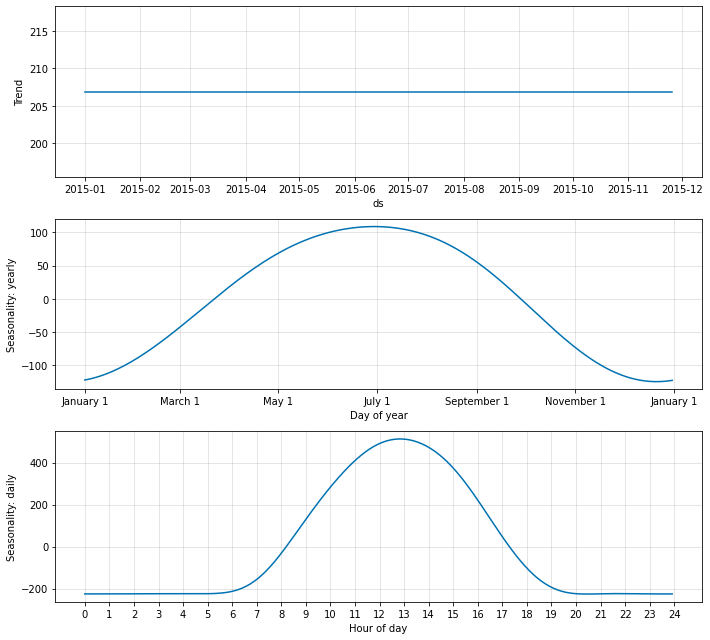

In [ ]:
fig_param = m.plot_parameters()


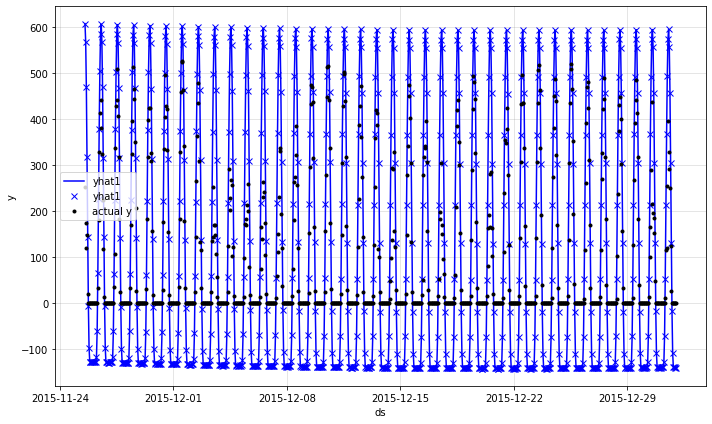

In [ ]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast)

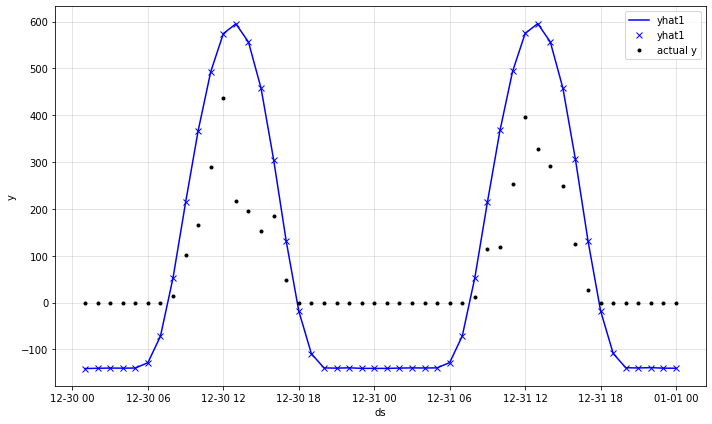

In [ ]:
fig_prediction = m.plot(forecast[-48:])


Auto-Regresseion

In [ ]:
m = NeuralProphet(
    growth='off',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3*24,
    learning_rate=0.01,
)

df_train, df_test = m.split_df(sf_pv_df, freq='H', valid_p = 0.10)

metrics = m.fit(df_train, freq='H', validation_df=df_test, progress='plot')

  0%|          | 0/109 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:922: UserWarning: Using a target size (torch.Size([868])) that is different to the input size (torch.Size([868, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)

  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



In [ ]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,Loss,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
108,0.001958,30.210406,52.61603,0.001445,0.0,0.02951,146.196976,214.272736


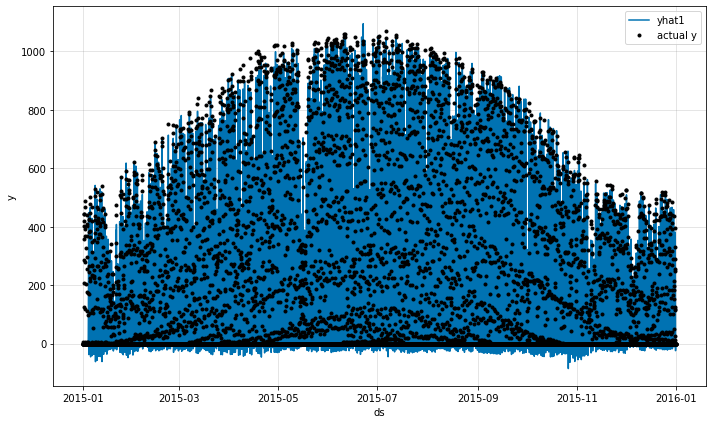

In [ ]:
forecast = m.predict(sf_pv_df)
fig = m.plot(forecast)

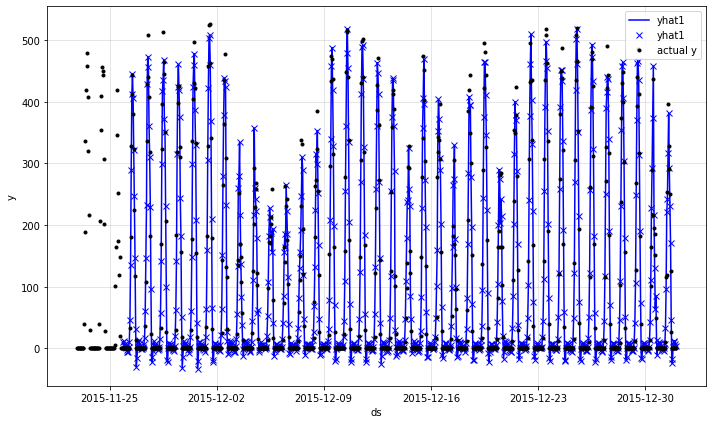

In [ ]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast)

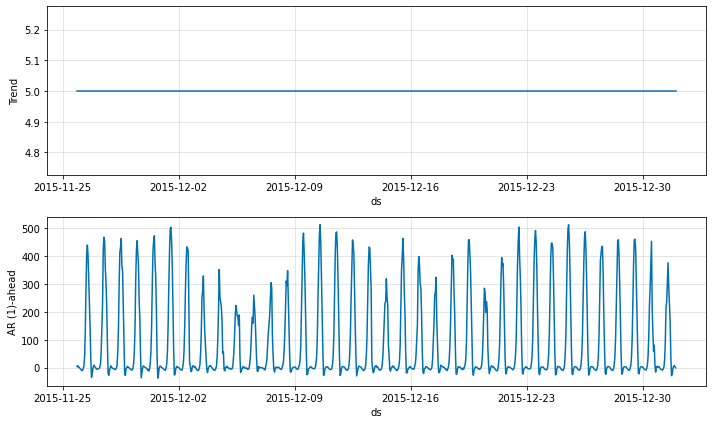

In [ ]:
fig_comp = m.plot_components(forecast)

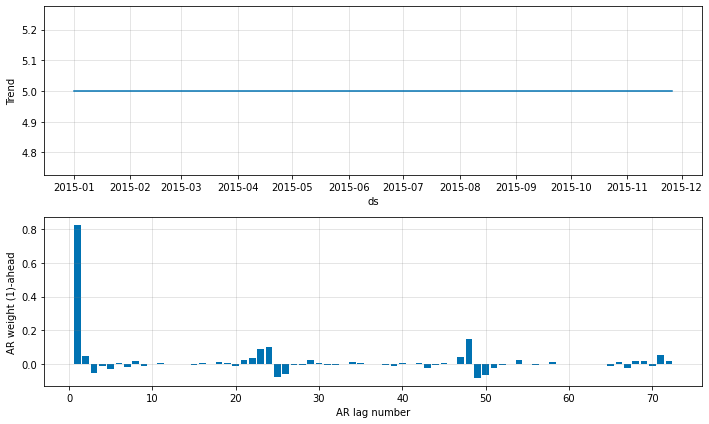

In [ ]:
fig_param = m.plot_parameters()


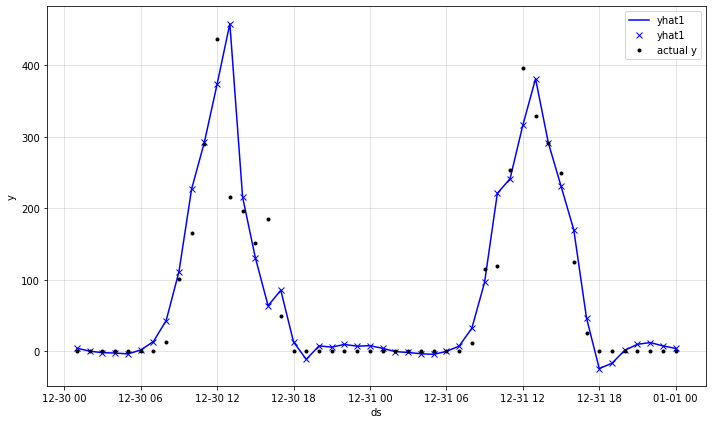

In [ ]:
fig_prediction = m.plot(forecast[-48:])


In [ ]:
m = NeuralProphet(
    growth='off',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3*24,
    ar_reg=1,
    learning_rate=0.01,
)

df_train, df_test = m.split_df(sf_pv_df, freq='H', valid_p = 0.10)

metrics = m.fit(df_train, freq='H', validation_df=df_test, progress='plot')

  0%|          | 0/109 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:922: UserWarning: Using a target size (torch.Size([868])) that is different to the input size (torch.Size([868, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)

  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



In [ ]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,Loss,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
108,0.002035,30.534054,53.805759,0.002071,0.000572,0.02921,144.859146,213.181091


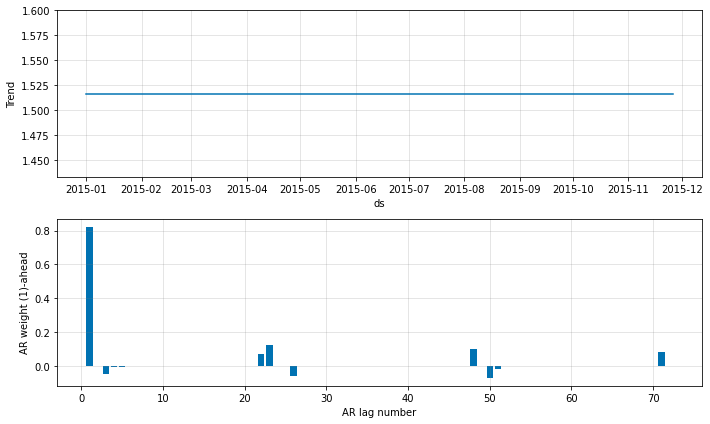

In [ ]:
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig_param = m.plot_parameters()

In [ ]:
df = sf_pv_df.copy(deep=True)
df["I"] = np.append(0, sf_pv_df["y"].values[1:] - sf_pv_df["y"].values[:-1])
df.tail(3)

,ds,y,I
8757,2015-12-31 22:00:00,0,0
8758,2015-12-31 23:00:00,0,0
8759,2016-01-01 00:00:00,0,0


In [ ]:
m = NeuralProphet(
    growth='off',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3*24,
    learning_rate=0.01,
)
m = m.add_lagged_regressor("I", normalize="standardize")
df_train, df_test = m.split_df(df, freq='H', valid_p = 0.10)

metrics = m.fit(df_train, freq='H', validation_df=df_test, progress='plot')

  0%|          | 0/109 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:922: UserWarning: Using a target size (torch.Size([868])) that is different to the input size (torch.Size([868, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)

  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



In [ ]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,Loss,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
108,0.001941,29.81582,52.332221,0.001432,0.0,0.029513,145.900238,214.285019


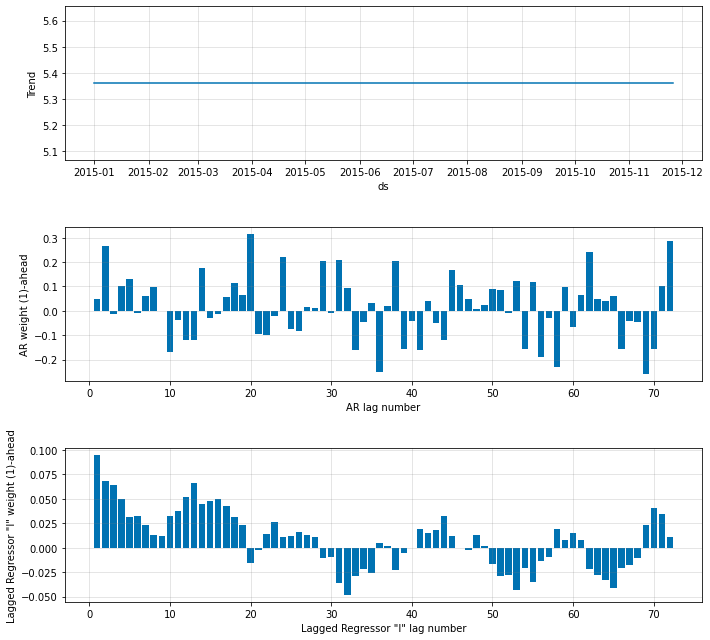

In [ ]:
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig_param = m.plot_parameters()

Neurl Network Training

In [ ]:
m = NeuralProphet(
    growth='off',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3*24,
    num_hidden_layers=4,
    d_hidden=8,
    learning_rate=0.003,
)

df = sf_pv_df.copy(deep=True)
df["I"] = np.append(0, sf_pv_df["y"].values[1:] - sf_pv_df["y"].values[:-1])
df_train, df_test = m.split_df(df, freq='H', valid_p = 0.10)
m = m.add_lagged_regressor("I", normalize="standardize")
metrics = m.fit(df_train, freq='H', validation_df=df_test, progress='plot')

  0%|          | 0/109 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:922: UserWarning: Using a target size (torch.Size([868])) that is different to the input size (torch.Size([868, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)

  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



In [ ]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,Loss,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
108,0.001133,19.955352,39.621953,0.000826,0.0,0.02909,142.277847,212.742386


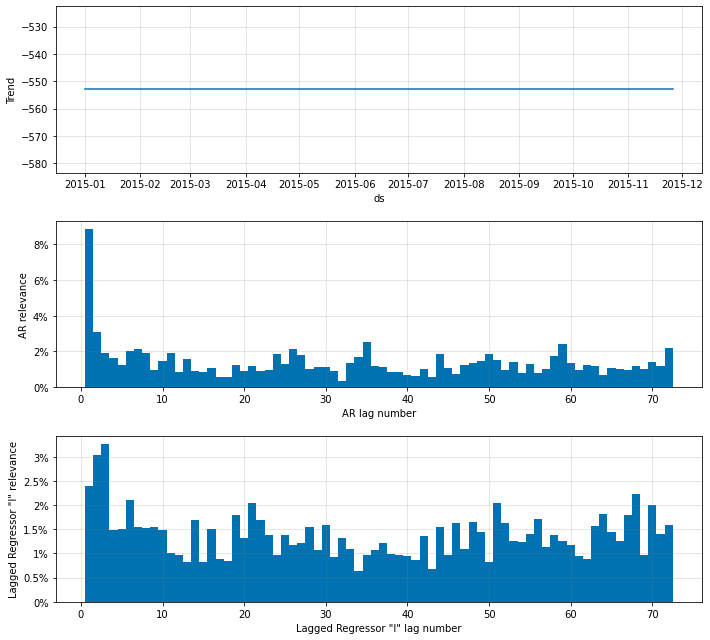

In [ ]:
fig = m.plot_parameters()

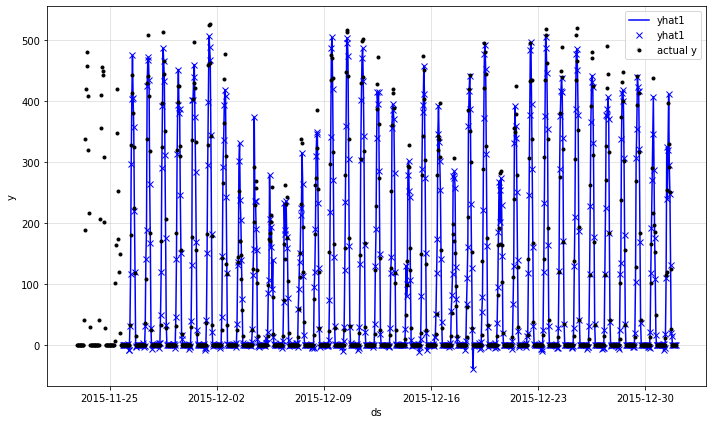

In [ ]:
m = m.highlight_nth_step_ahead_of_each_forecast(1)
forecast = m.predict(df_test)
fig = m.plot(forecast)

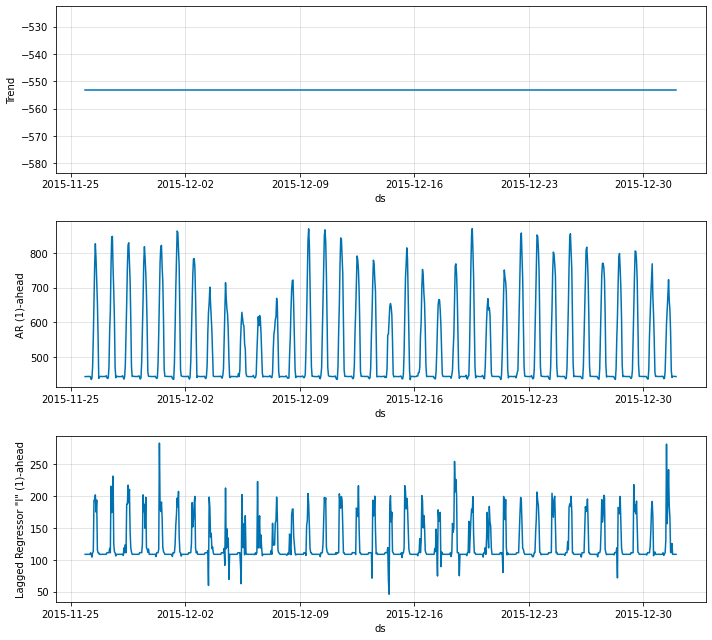

In [ ]:
fig_comp = m.plot_components(forecast)

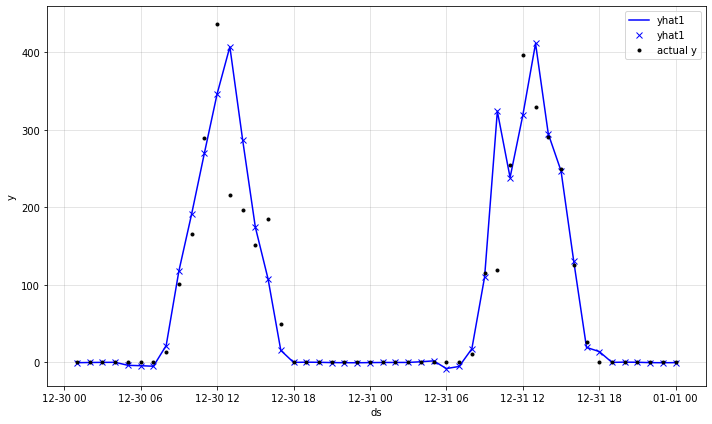

In [ ]:
fig_prediction = m.plot(forecast[-48:])